In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [15]:
directory = "/Users/alvin/Documents/GitHub/AY2324S1-ML-Empowered-Stat-Arb/Feature Data/"
features = ["volume", "close", "atr", "rsi", "obv", "adx"]
data = pd.DataFrame()
stock = "AAPL"
assigned = False
index = None
for feature in features:
    temp = pd.read_csv(f"{directory}{feature}.csv")    
    temp[feature] = temp["AAPL"]
    data = pd.concat([data, temp[feature]], axis = 1)
    if not assigned:
        assigned = True
        index = temp.datadate
data, index
    

(          volume   close       atr        rsi           obv        adx
 0     26641980.0   90.75       NaN        NaN  0.000000e+00        NaN
 1     42187570.0   94.58  5.430000        NaN  4.218757e+07  11.517517
 2     46038530.0   93.02  5.383571        NaN -3.850960e+06  47.438404
 3     26890770.0   91.01  5.159031        NaN -3.074173e+07  46.616455
 4     23670270.0   92.70  5.012671        NaN -7.071460e+06  50.903089
 ...          ...     ...       ...        ...           ...        ...
 2763  12119710.0  284.27  3.831502  74.436569  1.627693e+09  17.721660
 2764  23260940.0  289.91  3.965680  78.678967  1.650954e+09  16.578787
 2765  36556150.0  289.80  4.100275  78.405668  1.614398e+09  15.572356
 2766  36019910.0  291.52  4.340969  79.598974  1.650418e+09  14.656497
 2767  25172130.0  293.65  4.328043  80.999264  1.675590e+09  14.262704
 
 [2768 rows x 6 columns],
 0       2009-01-02
 1       2009-01-05
 2       2009-01-06
 3       2009-01-07
 4       2009-01-08
        

In [22]:
data.index = index.values

In [23]:
data

,volume,close,atr,rsi,obv,adx
2009-01-02,26641980.0,90.75,NaN,NaN,0.000000e+00,NaN
2009-01-05,42187570.0,94.58,5.430000,NaN,4.218757e+07,11.517517
2009-01-06,46038530.0,93.02,5.383571,NaN,-3.850960e+06,47.438404
2009-01-07,26890770.0,91.01,5.159031,NaN,-3.074173e+07,46.616455
2009-01-08,23670270.0,92.70,5.012671,NaN,-7.071460e+06,50.903089
...,...,...,...,...,...,...
2019-12-24,12119710.0,284.27,3.831502,74.436569,1.627693e+09,17.721660
2019-12-26,23260940.0,289.91,3.965680,78.678967,1.650954e+09,16.578787
2019-12-27,36556150.0,289.80,4.100275,78.405668,1.614398e+09,15.572356
2019-12-30,36019910.0,291.52,4.340969,79.598974,1.650418e+09,14.656497


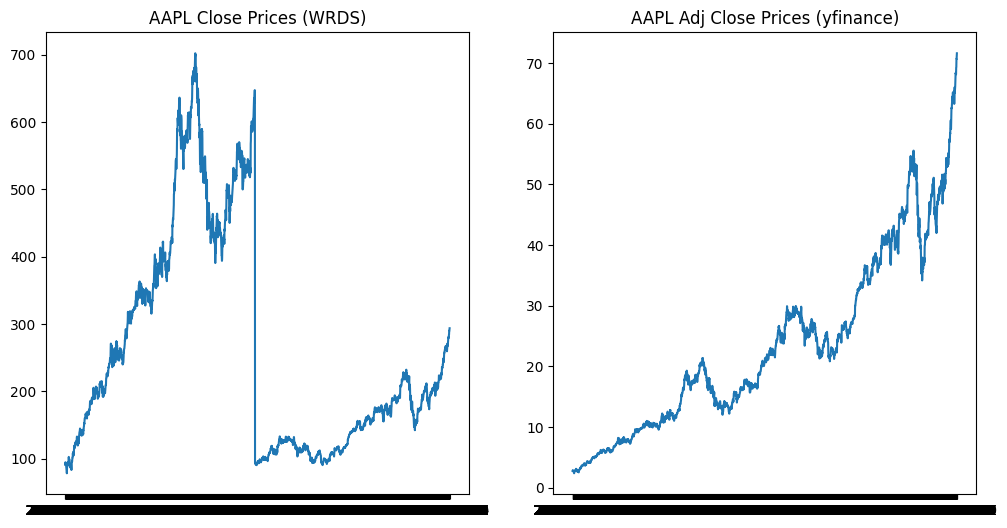

In [16]:
close = pd.read_csv("/Users/alvin/Documents/GitHub/AY2324S1-ML-Empowered-Stat-Arb/Feature Data/close.csv")
aapl_close = close["AAPL"]
yfinance_aapl = pd.read_csv("/Users/alvin/Documents/GitHub/AY2324S1-ML-Empowered-Stat-Arb/Data/individual_data/AAPL.csv")
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title("AAPL Close Prices (WRDS)")
axs[0].plot(close["datadate"], aapl_close)
axs[1].set_title("AAPL Adj Close Prices (yfinance)")
axs[1].plot(yfinance_aapl["Date"], yfinance_aapl["Adj Close"])
plt.show()

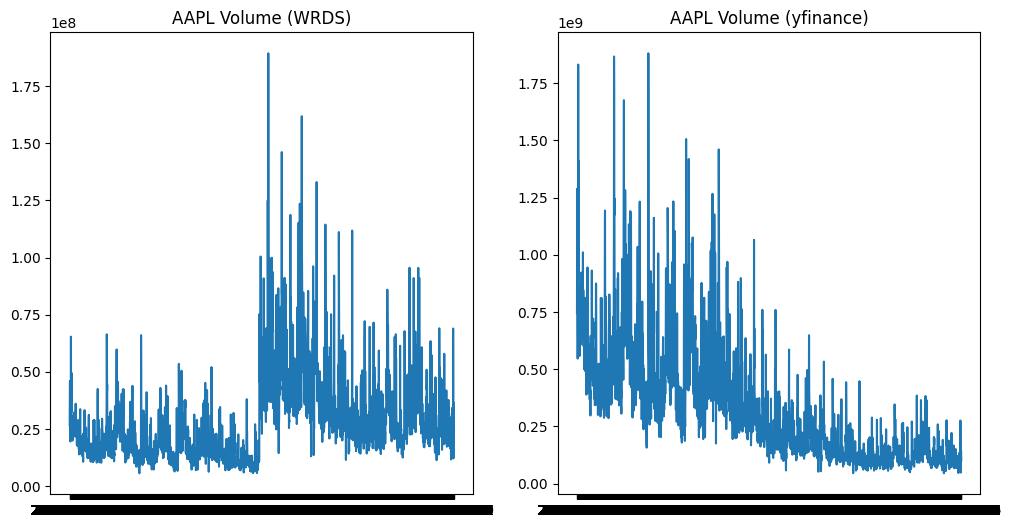

In [17]:
volume = pd.read_csv("/Users/alvin/Documents/GitHub/AY2324S1-ML-Empowered-Stat-Arb/Feature Data/volume.csv")
aapl_volume = volume["AAPL"]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title("AAPL Volume (WRDS)")
axs[0].plot(volume["datadate"], aapl_volume)
axs[1].set_title("AAPL Volume (yfinance)")
axs[1].plot(yfinance_aapl["Date"], yfinance_aapl["Volume"])
plt.show()

In [4]:
stocks = ['XOM', 'SHW', 'UPS', 'DUK', 'UNH', 'JPM', 'AMZN', 'AAPL', 'MSFT', 'AMT']

(2768, 489)